# Projeto 1 - Regressão Logística com Pyhton

Nesse script o objetivo será fazer uma análise preditiva com dados de pessoas que tiveram ou não diabetes usando um modelo de regressão logística. Com base nos sintomas apresentados, o modelo poderá fazer uma previsão aproximada se a pessoa terá ou não diabates. O objetivo do modelo é ter uma acurácia acima de 70% pelo menos. 

In [1]:
# carregando os pacotes e removendo os avisos
import numpy as np
import pandas as pd
import seaborn as sns
import scikitplot as skplt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from matplotlib import pylab
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Carregando o dataset
df = pd.read_csv('python_scripts/diabetes/diabetes_data_upload.csv')
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


## Dicionário de Dados

Neste seção do Jupyter Notebook, será registrado o dicionário de dados do dataset utilizado nesse projeto. O dataset foi feito com base em um questionário de pacientes do Sylhet Diabetes Hospital, localizado em Bangladesh. Nenhum dos pacientes é identificado no dataset. Os dados foram disponibilizados no repositório de Machine Learning da UCI. 

Atributos listados:

- Age 1.20-65
- Sex 1. Male, 2.Female
- Polyuria 1.Yes, 2.No.
- Polydipsia 1.Yes, 2.No.
- sudden weight loss 1.Yes, 2.No.
- Polyphagia 1.Yes, 2.No.
- Genital thrush 1.Yes, 2.No.
- visual blurring 1.Yes, 2.No.
- Itching 1.Yes, 2.No.
- Irritability 1.Yes, 2.No.
- delayed healing 1.Yes, 2.No.
- partial paresis 1.Yes, 2.No.
- muscle stiness 1.Yes, 2.No.
- Alopecia 1.Yes, 2.No.
- Obesity 1.Yes, 2.No.
- Class 1.Positive, 2.Negative.

Fonte: https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset


### 1 - Análise Exploratória e Pré-Processamento

In [3]:
# Novo dataset para o pré-processamento
df_2 = df
df_2.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
# O dataset tem colunas com strings quando na verdade são variáveis categóricas. Será necessário converter esses valores
# Yes e Male será 1, No e Female será 0. Positive = 1 e Negative = 0.

df_2 = df_2.replace(to_replace = ['Yes','No'], value = [1,0])
df_2 = df_2.replace(to_replace = ['Male', 'Female'], value = [1,0])
df_2 = df_2.replace(to_replace = ['Positive', 'Negative'], value = [1,0])
df_2.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [5]:
# Verificar se o dataset tem valores nulos. 
df_2.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

Text(0.5, 1.0, 'Histograma - Idade')

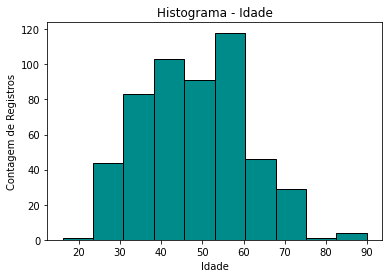

In [6]:
# Ao analisar o histograma das idades, vemos que a distribuição parece seguir uma normal. 
# Contudo, é necessário os testes de normalidade

plt.hist(df_2['Age'], color = 'darkcyan', edgecolor = 'black')
plt.ylabel('Contagem de Registros')
plt.xlabel('Idade')
plt.title('Histograma - Idade')

In [7]:
# teste de normalidade
# O teste rejeitou a normalidade dos dados. Nesse caso, o que pode ter ocasionado isso é o baixo volume de dados (520 registros).
# De acordo com o teorama do limite central, quanto maior o volume de dados mais próximo os dados ficam de uma distribuição normal
# Sendo assim, podemos continuar com as análises. Contudo, isso deve ser levado em consideração na conclusão. 

normal_test = stats.normaltest(df_2['Age'])
print("O valor p é:", round(normal_test.pvalue,4))

O valor p é: 0.0069


O total de registros é: 520
Para a classe 1 temos: 61.5 %
Para a classe 2 temos: 38.5 %


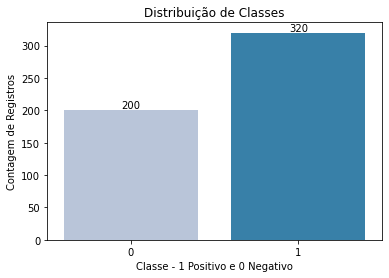

In [8]:
# Visualizando o balanceamento de classes

# Como o gráfico demonstra, temos um desbalanceamento de classes no dataset que é algo esperado. 
# O ideal é que as classes tenham uma distribuição próximo de 50%, sendo que até 45% em um classe seja aceitável. 
# No caso, temos uma classe com 61% e outra com 38%. Nesse caso, será necessário o balanceamento de classes.

graf_class = sns.countplot(x = 'class', data = df_2, palette = 'PuBu')
graf_class.bar_label(graf_class.containers[0])
graf_class.set_xlabel('Classe - 1 Positivo e 0 Negativo')
graf_class.set_ylabel('Contagem de Registros')
graf_class.set_title('Distribuição de Classes')

class_table = df_2['class'].value_counts()

print('O total de registros é:', class_table.sum())
print('Para a classe 1 temos:', round((class_table[1]/class_table.sum())*100,1),"%")
print('Para a classe 2 temos:', round((class_table[0]/class_table.sum())*100,1),"%")

In [9]:
# Balanceamento de Classes

# Divisão de x e y para o SMOTE
x = df_2.iloc[:, 0:16]
y = df_2.iloc[:, 16]

# Cria o balanceador SMOTE
smote_bal = SMOTE()

# Aplica o balanceador SMOTE
x_res, y_res = smote_bal.fit_resample(x, y)

In [10]:
y.dtypes

dtype('int64')

In [ ]:
# Classes foram balanceadas conforme o gráfico abaixo.

graf_class2 = sns.countplot(y_res, palette = 'PuBu')
graf_class2.bar_label(graf_class2.containers[0])
graf_class2.set_xlabel('Classe - 1 Positivo e 0 Negativo')
graf_class2.set_ylabel('Contagem de Registros')
graf_class2.set_title('Distribuição de Classes')

In [ ]:
# Ajustando X e Y
x = x_res
y = y_res


In [ ]:
x2 = df_2.iloc[:, 0:16]
y2 = df_2.iloc[:, 16]

In [ ]:
# Divisão dos dados em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3)

In [ ]:
x_treino2, x_teste2, y_treino2, y_teste2 = train_test_split(x2, y2, test_size = 0.3)

### 2 - Modelo de Machine Learning

#### Modelo 1 - Regressão Logística

In [ ]:
# Modelo de Regressão Logística

# Cria o modelo
modelo_logistic = LogisticRegression()

In [ ]:
# Fit do modelo
modelo_logistic.fit(x_treino,y_treino)

In [ ]:
# Previsões com o modelo
previsoes_1 = modelo_logistic.predict(x_teste)

In [ ]:
# Dados do Modelo
# O modelo apresentou resultados satisfatórios com uma precisão e acurácia acima de 90%.

Logistic_model = {'Modelo':'Regressão Logística',
                  'Precision':round(precision_score(previsoes_1, y_teste),4),
                  'Recall':round(recall_score(previsoes_1, y_teste),4),
                  'F1 Score':round(f1_score(previsoes_1, y_teste),4),
                  'Acurácia':round(accuracy_score(previsoes_1, y_teste),4),
                  'AUC':round(roc_auc_score(y_teste, previsoes_1),4)}



print('Resultado do Modelo 1:\n')
Logistic_model

In [ ]:
# Confusion Matrix
# Ao analisar a Confusion Matrix, vemos que o modelo teve um ótimo desempenho.
# O True Negative e True Positive tiveram um acerto  muito bom, indicando que o modelo aprender corretamente.

cf_matrix = confusion_matrix(y_teste, previsoes_1)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues', cbar=False)

ax.set_title('Confusion Matrix - Logistic Regression\n\n');
ax.set_xlabel('\nValores Previstos')
ax.set_ylabel('Valores Atuais');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [ ]:
cf_matrix = confusion_matrix(y_teste2, previsoes_2)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues', cbar=False)

ax.set_title('Confusion Matrix - Logistic Regression\n\n');
ax.set_xlabel('\nValores Previstos')
ax.set_ylabel('Valores Atuais');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [ ]:
cf_matrix = confusion_matrix(y_teste2, previsoes_2)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

#### Modelo 2 - Árvore de Decisão

In [ ]:
# Cria o modelo
modelo_arvore = DecisionTreeClassifier()

In [ ]:
# Fit do modelo
modelo_arvore.fit(x_treino, y_treino)

In [ ]:
# Previsões com o modelo
previsoes_2 = modelo_arvore.predict(x_teste)

In [ ]:
# Dados do Modelo
# O modelo apresentou resultados satisfatórios com uma precisão e acurácia acima de 90%.

DecisionTree_model = {'Modelo':'Árvore de Decisão',
                  'Precision':round(precision_score(previsoes_2, y_teste),4),
                  'Recall':round(recall_score(previsoes_2, y_teste),4),
                  'F1 Score':round(f1_score(previsoes_2, y_teste),4),
                  'Acurácia':round(accuracy_score(previsoes_2, y_teste),4),
                  'AUC':round(roc_auc_score(y_teste, previsoes_2),4)}



print('Resultado do Modelo 2:\n')
DecisionTree_model

In [ ]:
# Confusion Matrix
# Ao analisar a Confusion Matrix, vemos que o modelo teve um ótimo desempenho.
# O True Negative e True Positive tiveram um acerto  muito bom, indicando que o modelo aprender corretamente.

cf_matrix = confusion_matrix(y_teste, previsoes_2)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues', cbar=False)

ax.set_title('Confusion Matrix - Decision Tree\n\n');
ax.set_xlabel('\nValores Previstos')
ax.set_ylabel('Valores Atuais');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

#### Modelo 3 - Random Forest

In [ ]:
# Cria o modelo
modelo_RandomForest = RandomForestClassifier()

In [ ]:
# Fit do modelo
modelo_RandomForest.fit(x_treino, y_treino)

In [ ]:
# Previsões com o modelo
previsoes_3 = modelo_RandomForest.predict(x_teste)

In [ ]:
# Dados do Modelo
# O modelo apresentou resultados satisfatórios com uma precisão e acurácia acima de 90%.

RandomForest_model = {'Modelo':'Random Forest',
                  'Precision':round(precision_score(previsoes_3, y_teste),4),
                  'Recall':round(recall_score(previsoes_3, y_teste),4),
                  'F1 Score':round(f1_score(previsoes_3, y_teste),4),
                  'Acurácia':round(accuracy_score(previsoes_3, y_teste),4),
                  'AUC':round(roc_auc_score(y_teste, previsoes_3),4)}



print('Resultado do Modelo 3:\n')
RandomForest_model

In [ ]:
# Confusion Matrix
# Ao analisar a Confusion Matrix, vemos que o modelo teve um ótimo desempenho.
# O True Negative e True Positive tiveram um acerto  muito bom, indicando que o modelo aprender corretamente.

cf_matrix = confusion_matrix(y_teste, previsoes_3)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues', cbar=False)

ax.set_title('Confusion Matrix - Decision Tree\n\n');
ax.set_xlabel('\nValores Previstos')
ax.set_ylabel('Valores Atuais');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

### 3 - Conclusão da Análise

In [ ]:
# Plot da curva ROC

# Gráfico 1 - Regressão Logística
y_true = y_teste
y_probas_logistic = modelo_logistic.predict_proba(x_teste)
skplt.metrics.plot_roc_curve(y_true, y_probas_logistic)

plt.show()

O gráfico da curva ROC para o modelo de Regressão Logística mostra um modelo com uma performance, no geral, excelente apresentando uma acurácia de 97% aproximadamente. 

In [ ]:
# Gráfico 2 - Árvore de Decisão
y_probas_decisiontree = modelo_arvore.predict_proba(x_teste)
skplt.metrics.plot_roc_curve(y_true, y_probas_decisiontree)

No caso da curva ROC com a árvore de decisão, temos uma resultado aparentemente melhor com 98% de acurácia. Contudo, um percentual muito próximo de 100% e levando em consideração que temos um dataset pequeno (520 registros no total, sem o balanceamento de classes) pode indicar um modelo com overfitting. 

In [ ]:
# Gráfico 3 - Random Forest
y_probas_randomforest = modelo_RandomForest.predict_proba(x_teste)
skplt.metrics.plot_roc_curve(y_true, y_probas_randomforest)

No caso da curva ROC com Random Forest, temos uma resultado aparentemente melhor com 100% de acurácia. Contudo, um percentual igual a 100% e leva a indicar que temos um modelo com overfitting.

Em relação aos 3 modelos, a melhor escolha seria o com Regressão Logística porque vale lembrar que o modelo tem um erro aproximado visto que a fórmula matemática por trás do modelo são de aproximação. O ideal é que se tenha alguma margem de erro mesmo para evitar modelos com overfitting. 